# Caracterizando al cluster de clientes numero 1

Gracias a la tabla de Características Distintivas sabemos de este grupo que:

1. El articulo que gustan comprar son botas en la categoria de calzado
2. Los Estados del pais que compran las botas en la categoria de calzado en este primer grupo son: Massachusetts, Kansas, South Carolina, Maine, Ohio, Nebraska, New Hampshire, Utah, Pennsylvania

Gracias a la tabla de Análisis Comparativo del Clúster 1 vs. Otros Clústeres sabemos de este grupo que:

1. No tiene diferencias significativas en Age, Purchase Amount (USD), Review Rating ni Previous Purchases en comparación con el resto de los clústeres. En otras palabras, es un grupo que, numéricamente, se comporta de manera "promedio" en todas sus variables."

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, kruskal

df_customer = pd.read_csv("dataset/segmented_customers.csv")
# df_customer.head()

## Analizando aun mas al grupo

Ahora intentare reponder preguntas especificas de este grupo ahora que ya conocemos sus caracteristicas principales para consolidar los conociminetos de dicho grupo

#### Pregunta 1: ¿Cómo se distribuye el gasto en 'Purchase Amount (USD)' para su artículo distintivo, las 'Boots, dentro de este clúster? ¿Existe una relación entre el tipo de calzado que compran y el monto de la compra?

Dado que La tabla de 'Características Distintivas' nos dice que su artículo principal es 'Boots'. Ahora, vamos a comparar el gasto de ese artículo con otros dentro de la misma categoría.

In [2]:
# Filtramos el DataFrame para el Clúster 1 (etiquetado como 0) 
df_cluster_1 = df_customer[df_customer['Cluster'] == 0].copy()

Respondiendo a la pregunta 1: Distribución del gasto por artículo de compra en el Clúster 1 (etiquetado como 0).


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_1436\1421138231.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item Purchased', y='Purchase Amount (USD)', data=df_cluster_1, palette='pastel')


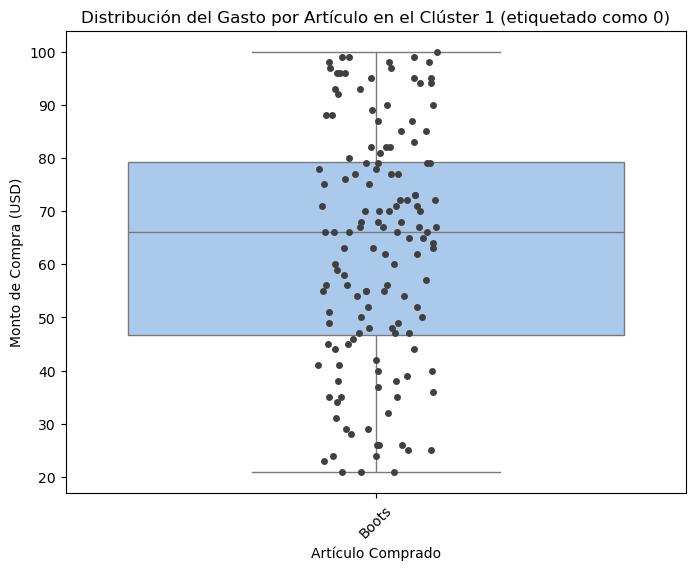

In [3]:
print("Respondiendo a la pregunta 1: Distribución del gasto por artículo de compra en el Clúster 1 (etiquetado como 0).")

# Creamos un box plot para visualizar la distribución del gasto por artículo de compra.
# Usamos 'hue' para diferenciar los puntos por artículo, lo que hace el gráfico más claro.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Item Purchased', y='Purchase Amount (USD)', data=df_cluster_1, palette='pastel')
sns.stripplot(x='Item Purchased', y='Purchase Amount (USD)', data=df_cluster_1, color=".25", jitter=True)

plt.title('Distribución del Gasto por Artículo en el Clúster 1 (etiquetado como 0)')
plt.xlabel('Artículo Comprado')
plt.ylabel('Monto de Compra (USD)')
plt.xticks(rotation=45)
plt.show()

Basado en este gráfico, el gasto en 'Boots' para el Clúster 1 es:

1. Centralizado: La mayoría de las compras se concentran alrededor de la mediana de $66 USD.

2. Rango medio-alto: Aunque el clúster en general es "promedio" en gasto, las compras de Boots muestran un rango que va desde un gasto bajo hasta un gasto muy alto, lo que podría indicar una variedad de precios para este tipo de artículo.

3. Sin outliers extremos: El stripplot no muestra puntos muy alejados de los bigotes, lo que indica que no hay gastos exageradamente altos o bajos que distorsionen la distribución.

En conclusión, este gráfico confirma que el clúster 1 tiene un comportamiento de gasto "promedio" en la compra de Boots, pero el análisis detallado revela un rango de precios significativo para este artículo.

#### Pregunta 2: ¿Existe una relación entre el tipo de artículo comprado (Item Purchased) y el género (Gender) en este clúster?

Es decir compran mas botas los hombres que las mujeres o viseversa en este grupo? para reponder a estas interrogantes seguiremos los siguientes pasos

In [4]:
# Paso 1: Crear una tabla de contingencia para el análisis
# Esta tabla cuenta la frecuencia de cada combinación de género y artículo comprado.
# Al ser un clúster que destaca por la compra de 'Boots', es crucial ver cómo se distribuye esta categoría.
contingency_table = pd.crosstab(df_cluster_1['Gender'], df_cluster_1['Item Purchased'])
print("### Tabla de Contingencia de Género vs. Artículo Comprado en el Clúster 1 ###\n")
print(contingency_table.to_markdown())


### Tabla de Contingencia de Género vs. Artículo Comprado en el Clúster 1 ###

| Gender   |   Boots |
|:---------|--------:|
| Female   |      50 |
| Male     |      90 |


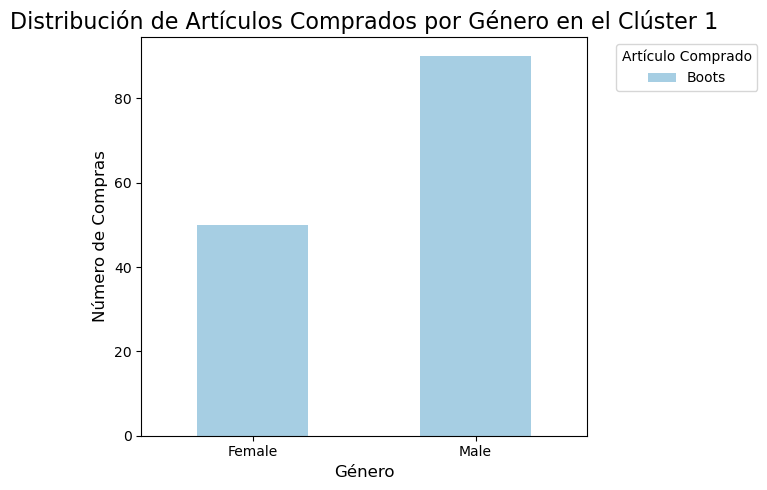

In [5]:
# Paso 2: Visualizar la relación con un gráfico de barras apiladas
# Usamos un gráfico de barras apiladas para ver la proporción de cada artículo por género.
fig, ax = plt.subplots(figsize=(7, 5))
contingency_table.plot(kind='bar', stacked=True, ax=ax, colormap='Paired')
plt.title('Distribución de Artículos Comprados por Género en el Clúster 1', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Compras', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Artículo Comprado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
# Paso 3: Realizar la prueba de Chi-cuadrado para la validación estadística
# La prueba de Chi-cuadrado determina si hay una asociación significativa entre las dos variables categóricas.
# Hipótesis Nula ($H_0$): Las variables 'Gender' e 'Item Purchased' son independientes (no hay relación).
# Hipótesis Alternativa ($H_a$): Las variables 'Gender' e 'Item Purchased' no son independientes (existe una relación).
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimimos los resultados de la prueba en formato Markdown para un Jupyter Notebook
print("\n### Resultados de la Prueba de Chi-cuadrado ###")
print(f"**Estadística de Chi-cuadrado:** ${chi2:.2f}$")
print(f"**Valor p:** ${p_value:.4f}$")
print(f"**Grados de libertad (dof):** ${dof}$")
print("\n---")


### Resultados de la Prueba de Chi-cuadrado ###
**Estadística de Chi-cuadrado:** $0.00$
**Valor p:** $1.0000$
**Grados de libertad (dof):** $0$

---


In [7]:
# Paso 4: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value < alpha:
    print(f"Con un valor p (${p_value:.4f}$) menor que el nivel de significancia de ${alpha}$, rechazamos la hipótesis nula.")
    print("Esto significa que hay una asociación estadísticamente significativa entre el género y el tipo de artículo comprado en el Clúster 1.")
    print("El gráfico de barras apiladas y la tabla de contingencia muestran esta relación visualmente. Por ejemplo, podemos ver si la proporción de compras de 'Boots' es significativamente diferente entre hombres y mujeres.")
else:
    print(f"Con un valor p (${p_value:.4f}$) mayor que el nivel de significancia de ${alpha}$, no podemos rechazar la hipótesis nula.")
    print("Esto sugiere que no hay evidencia de una asociación significativa entre el género y el tipo de artículo comprado en el Clúster 1. La distribución de compras por artículo es similar para ambos géneros.")



### Interpretación del Resultado ###
Con un valor p ($1.0000$) mayor que el nivel de significancia de $0.05$, no podemos rechazar la hipótesis nula.
Esto sugiere que no hay evidencia de una asociación significativa entre el género y el tipo de artículo comprado en el Clúster 1. La distribución de compras por artículo es similar para ambos géneros.


Gracias a la prueba chi cuadrada anteriormente ejecutada comprobamos que pese a existir una diferencia entre la compra de hombres y mujeres en el articulo de las botas esta no es significativa y mas bien puede ser un producto del azar

#### Pregunta 3: ¿La frecuencia de compra (Frequency of Purchases) varía según la ubicación (Location) en este clúster?

Lo que buscamos reponder aqui es si por ejemplo el tipo de frecuencia de compra varia dependiendo del Estado (ubicacion) en que se encuetren los clientes en este cluster y para responder esto vamos a hacer los siguientes pasos

In [8]:
# Paso 1: Crear una tabla de contingencia para el análisis
# Esta tabla nos mostrará la distribución de la frecuencia de compra por ubicación.
contingency_table_location = pd.crosstab(df_cluster_1['Frequency of Purchases'], df_cluster_1['Location'])
print("### Tabla de Contingencia de Frecuencia de Compra vs. Ubicación en el Clúster 1 ###\n")
print(contingency_table_location.to_markdown())

### Tabla de Contingencia de Frecuencia de Compra vs. Ubicación en el Clúster 1 ###

| Frequency of Purchases   |   Alabama |   Alaska |   Arkansas |   California |   Connecticut |   Delaware |   Florida |   Georgia |   Hawaii |   Idaho |   Illinois |   Indiana |   Iowa |   Kansas |   Kentucky |   Louisiana |   Maine |   Maryland |   Massachusetts |   Michigan |   Minnesota |   Mississippi |   Missouri |   Montana |   Nebraska |   Nevada |   New Hampshire |   New Jersey |   New Mexico |   New York |   North Carolina |   Ohio |   Oklahoma |   Oregon |   Pennsylvania |   Rhode Island |   South Carolina |   South Dakota |   Tennessee |   Texas |   Utah |   Vermont |   Virginia |   Washington |   West Virginia |   Wisconsin |   Wyoming |
|:-------------------------|----------:|---------:|-----------:|-------------:|--------------:|-----------:|----------:|----------:|---------:|--------:|-----------:|----------:|-------:|---------:|-----------:|------------:|--------:|-----------:|--------

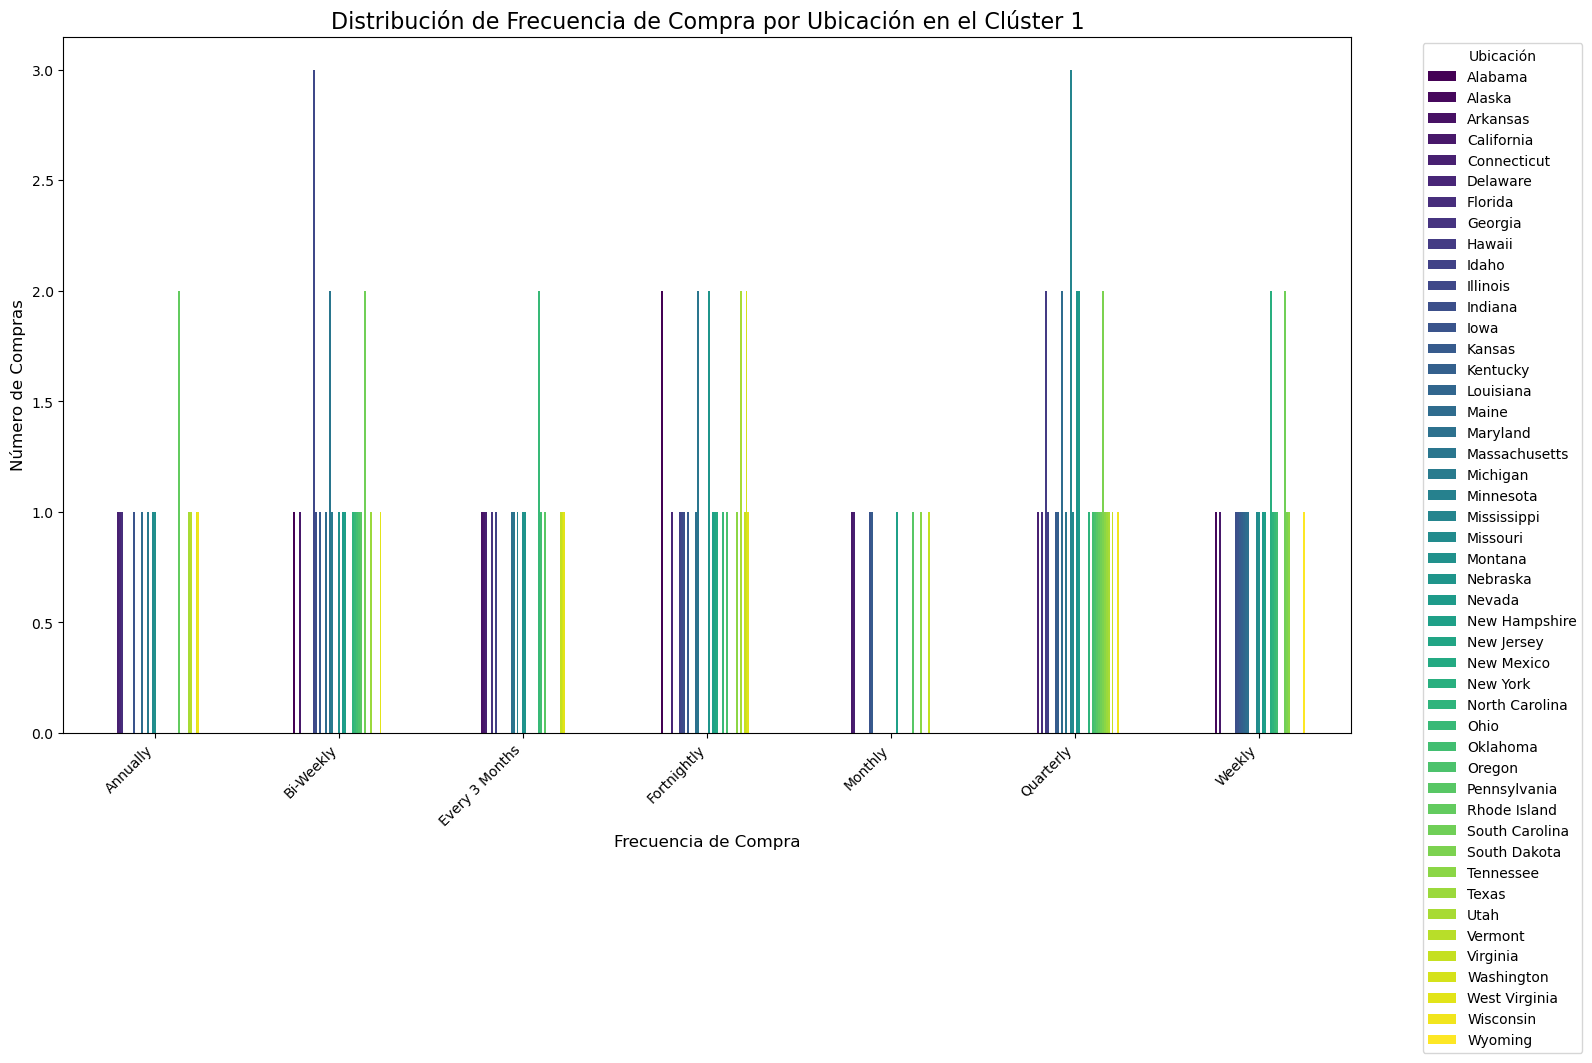

In [9]:
# Paso 2: Visualizar la relación con un gráfico de barras agrupadas
# Un gráfico de barras agrupadas es ideal para comparar las frecuencias por ubicación.
contingency_table_location.plot(kind='bar', figsize=(16, 10), colormap='viridis')
plt.title('Distribución de Frecuencia de Compra por Ubicación en el Clúster 1', fontsize=16)
plt.xlabel('Frecuencia de Compra', fontsize=12)
plt.ylabel('Número de Compras', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ubicación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
# Paso 3: Realizar la prueba de Chi-cuadrado para la validación estadística
# La prueba de Chi-cuadrado nos dirá si la variación observada es estadísticamente significativa.
# Hipótesis Nula ($H_0$): Las variables 'Frequency of Purchases' y 'Location' son independientes.
# Hipótesis Alternativa ($H_a$): Las variables no son independientes (existe una relación).
chi2_loc, p_value_loc, dof_loc, expected_loc = chi2_contingency(contingency_table_location)

# Imprimimos los resultados de la prueba en formato Markdown
print("\n### Resultados de la Prueba de Chi-cuadrado ###")
print(f"**Estadística de Chi-cuadrado:** ${chi2_loc:.2f}$")
print(f"**Valor p:** ${p_value_loc:.4f}$")
print(f"**Grados de libertad (dof):** ${dof_loc}$")
print("\n---")


### Resultados de la Prueba de Chi-cuadrado ###
**Estadística de Chi-cuadrado:** $257.15$
**Valor p:** $0.7861$
**Grados de libertad (dof):** $276$

---


In [11]:
# Paso 4: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value_loc < alpha:
    print(f"Con un valor p (${p_value_loc:.4f}$) menor que el nivel de significancia de ${alpha}$, rechazamos la hipótesis nula.")
    print("Esto significa que hay una asociación estadísticamente significativa entre la frecuencia de compra y la ubicación en el Clúster 1.")
    print("Podemos concluir que la frecuencia de compra varía de manera no aleatoria en diferentes estados.")
else:
    print(f"Con un valor p (${p_value_loc:.4f}$) mayor que el nivel de significancia de ${alpha}$, no podemos rechazar la hipótesis nula.")
    print("Esto sugiere que no hay evidencia de una asociación significativa entre la frecuencia de compra y la ubicación en el Clúster 1.")
    print("La frecuencia de compra en este clúster es consistente en todas las ubicaciones.")



### Interpretación del Resultado ###
Con un valor p ($0.7861$) mayor que el nivel de significancia de $0.05$, no podemos rechazar la hipótesis nula.
Esto sugiere que no hay evidencia de una asociación significativa entre la frecuencia de compra y la ubicación en el Clúster 1.
La frecuencia de compra en este clúster es consistente en todas las ubicaciones.


Por tanto no podemos invalidar la idea inicial ya que esta sigue siendo correcta: la frecuencia de compra en el Clúster 1 es homogénea y no está significativamente asociada con la ubicación.

#### Pregunta 4: ¿Cómo se relaciona la estación del año (Season) con los artículos que se compran en este clúster? 

Esta es una pregunta crucial para un clúster de compradores de botas, ya que la estacionalidad es clave en el comercio minorista y para reponder la misma efectuaremos los siguientes pasos

In [12]:
# Paso 1: Crear una tabla de contingencia para el análisis
# Esta tabla nos mostrará la distribución de los artículos comprados por estación.
contingency_table_season = pd.crosstab(df_cluster_1['Season'], df_cluster_1['Item Purchased'])
print("### Tabla de Contingencia de Estación vs. Artículo Comprado en el Clúster 1 ###\n")
print(contingency_table_season.to_markdown())

### Tabla de Contingencia de Estación vs. Artículo Comprado en el Clúster 1 ###

| Season   |   Boots |
|:---------|--------:|
| Fall     |      31 |
| Spring   |      40 |
| Summer   |      38 |
| Winter   |      31 |


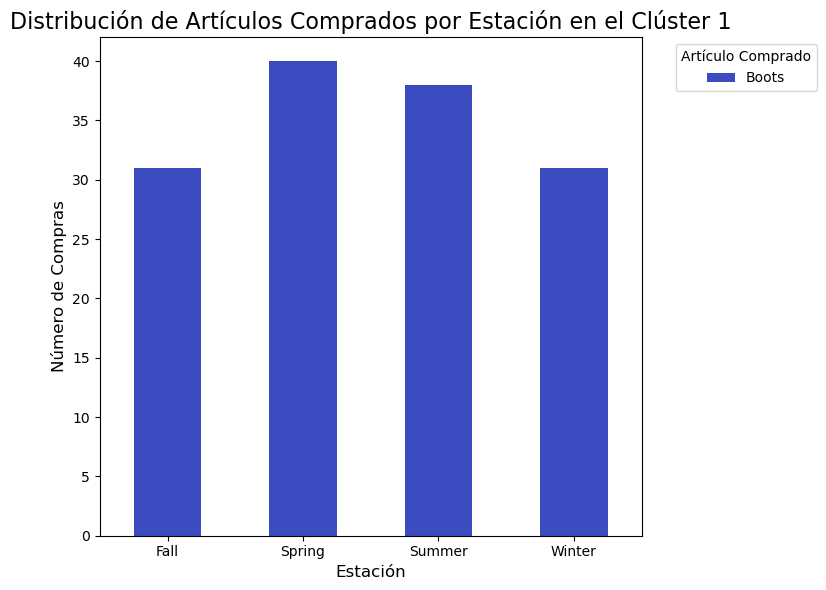

In [13]:
# Paso 2: Visualizar la relación con un gráfico de barras apiladas
# Un gráfico de barras apiladas es ideal para comparar la composición de artículos en cada estación.
contingency_table_season.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')
plt.title('Distribución de Artículos Comprados por Estación en el Clúster 1', fontsize=16)
plt.xlabel('Estación', fontsize=12)
plt.ylabel('Número de Compras', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Artículo Comprado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
# Paso 3: Realizar la prueba de Chi-cuadrado para la validación estadística
# La prueba de Chi-cuadrado nos dirá si la relación observada es estadísticamente significativa.
# Hipótesis Nula ($H_0$): Las variables 'Season' e 'Item Purchased' son independientes (no hay relación).
# Hipótesis Alternativa ($H_a$): Las variables no son independientes (existe una relación).
chi2_season, p_value_season, dof_season, expected_season = chi2_contingency(contingency_table_season)

# Imprimimos los resultados de la prueba en formato Markdown
print("\n### Resultados de la Prueba de Chi-cuadrado ###")
print(f"**Estadística de Chi-cuadrado:** ${chi2_season:.2f}$")
print(f"**Valor p:** ${p_value_season:.4f}$")
print(f"**Grados de libertad (dof):** ${dof_season}$")
print("\n---")


### Resultados de la Prueba de Chi-cuadrado ###
**Estadística de Chi-cuadrado:** $0.00$
**Valor p:** $1.0000$
**Grados de libertad (dof):** $0$

---


In [15]:
# Paso 4: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value_season < alpha:
    print(f"Con un valor p (${p_value_season:.4f}$) menor que el nivel de significancia de ${alpha}$, rechazamos la hipótesis nula.")
    print("Esto significa que hay una asociación estadísticamente significativa entre la estación y el tipo de artículo comprado en el Clúster 1.")
    print("El gráfico de barras apiladas y la tabla de contingencia nos ayudarán a entender cómo las compras de 'Boots' se concentran en ciertas estaciones.")
else:
    print(f"Con un valor p (${p_value_season:.4f}$) mayor que el nivel de significancia de ${alpha}$, no podemos rechazar la hipótesis nula.")
    print("Esto sugiere que no hay evidencia de una asociación significativa entre la estación y el tipo de artículo comprado en el Clúster 1.")
    print("La distribución de compras por artículo en este clúster es consistente a lo largo de las estaciones.")



### Interpretación del Resultado ###
Con un valor p ($1.0000$) mayor que el nivel de significancia de $0.05$, no podemos rechazar la hipótesis nula.
Esto sugiere que no hay evidencia de una asociación significativa entre la estación y el tipo de artículo comprado en el Clúster 1.
La distribución de compras por artículo en este clúster es consistente a lo largo de las estaciones.


Aunque este clúster fue identificado por sus compras de botas, los datos no muestran una relación estadísticamente significativa entre la estación del año y la compra de artículos. El valor p de 1.0000 indica que la distribución de compras de botas es sorprendentemente uniforme a lo largo del año (31 en invierno, 40 en primavera, 38 en verano y 31 en otoño). Esto desafía nuestra suposición inicial de que el 90% de las compras se concentrarían en otoño e invierno. Este hallazgo es crucial para la gestión de inventario, ya que sugiere que las promociones y el stock de botas pueden ser más consistentes durante todo el año en lugar de estar enfocados estacionalmente.

#### Pregunta 5: ¿Existe una diferencia en la Calificación de Reseña (Review Rating) entre las diferentes Estaciones (Season)? 

A continuación, exploraremos si existe una relación entre la temporada del año y las calificaciones de reseñas de los productos. Para ello, realizaremos un análisis estadístico comparando las distribuciones de las calificaciones entre las diferentes estaciones.

Nuestra hipótesis es que podría haber variaciones en la percepción de la calidad del producto en función de la temporada en la que se realiza la compra o la reseña. Utilizaremos el gráfico de caja (boxplot) para una visualización inicial y una prueba no paramétrica, como la prueba de Kruskal-Wallis, para determinar si las diferencias observadas son estadísticamente significativas.

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_1436\2271400881.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Review Rating', data=df_cluster_1, palette='pastel')


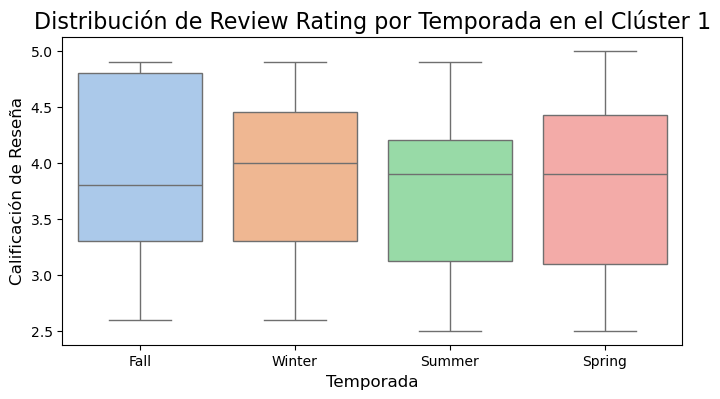

In [16]:
# Paso 1: Visualizar la distribución de los ratings por temporada
# Un box plot es ideal para ver la mediana, cuartiles y posibles valores atípicos.
plt.figure(figsize=(8, 4))
sns.boxplot(x='Season', y='Review Rating', data=df_cluster_1, palette='pastel')
plt.title('Distribución de Review Rating por Temporada en el Clúster 1', fontsize=16)
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Calificación de Reseña', fontsize=12)
plt.show()

In [17]:
# Paso 2: Preparar los datos para la prueba de Kruskal-Wallis
# Creamos una lista de las calificaciones de reseña, agrupadas por temporada.
ratings_by_season = [df_cluster_1['Review Rating'][df_cluster_1['Season'] == s].values for s in df_cluster_1['Season'].unique()]

# Paso 3: Realizar la prueba de Kruskal-Wallis
# Hipótesis Nula ($H_0$): Las distribuciones de las calificaciones de reseña son iguales en todas las temporadas.
# Hipótesis Alternativa ($H_a$): Al menos una de las distribuciones es significativamente diferente.
kruskal_stat, p_value_kruskal = kruskal(*ratings_by_season)

print("### Resultados de la Prueba de Kruskal-Wallis ###")
print(f"**Estadística H:** ${kruskal_stat:.4f}$")
print(f"**Valor p:** ${p_value_kruskal:.4f}$")
print("\n---")

### Resultados de la Prueba de Kruskal-Wallis ###
**Estadística H:** $0.8307$
**Valor p:** $0.8421$

---


In [18]:
#  Paso 4 Imprimir las conclusiones
print("\n---")
print("### Conclusión del análisis ###")
if p_value_kruskal < 0.05:
    print(f"**El valor p de ${p_value_kruskal:.4f}$ es menor que el nivel de significancia (0.05).**")
    print("**Conclusión:** Se rechaza la hipótesis nula ($H_0$). Existe una diferencia estadísticamente significativa en las distribuciones de las calificaciones de reseñas entre las diferentes temporadas.")
else:
    print(f"**El valor p de ${p_value_kruskal:.4f}$ es mayor o igual que el nivel de significancia (0.05).**")
    print("**Conclusión:** No se rechaza la hipótesis nula ($H_0$). No existe una diferencia estadísticamente significativa en las distribuciones de las calificaciones de reseñas entre las diferentes temporadas.")



---
### Conclusión del análisis ###
**El valor p de $0.8421$ es mayor o igual que el nivel de significancia (0.05).**
**Conclusión:** No se rechaza la hipótesis nula ($H_0$). No existe una diferencia estadísticamente significativa en las distribuciones de las calificaciones de reseñas entre las diferentes temporadas.


En conclusión: No se encontró una diferencia estadísticamente significativa en la distribución de las calificaciones de reseñas entre las diferentes temporadas. Esto sugiere que la temporada del año no influye de manera significativa en la calificación que los clientes le otorgan a un producto en este clúster.

#### Pregunta 6: ¿Existe una diferencia en la aplicación de descuentos (Discount Applied) entre hombres y mujeres? 

Hacemos esta pregunta ya que nos ayudará a entender si hay una relación entre el género y el uso de descuentos, lo cual es muy útil para las campañas de marketing etc.

In [19]:
# Paso 1: Crear una tabla de contingencia para el análisis
# Esta tabla mostrará la distribución de uso de descuentos por género.
contingency_table_discount = pd.crosstab(df_cluster_1['Gender'], df_cluster_1['Discount Applied'])
print("### Tabla de Contingencia de Género vs. Descuento Aplicado en el Clúster 1 ###\n")
print(contingency_table_discount.to_markdown())

### Tabla de Contingencia de Género vs. Descuento Aplicado en el Clúster 1 ###

| Gender   |   No |   Yes |
|:---------|-----:|------:|
| Female   |   50 |     0 |
| Male     |   26 |    64 |


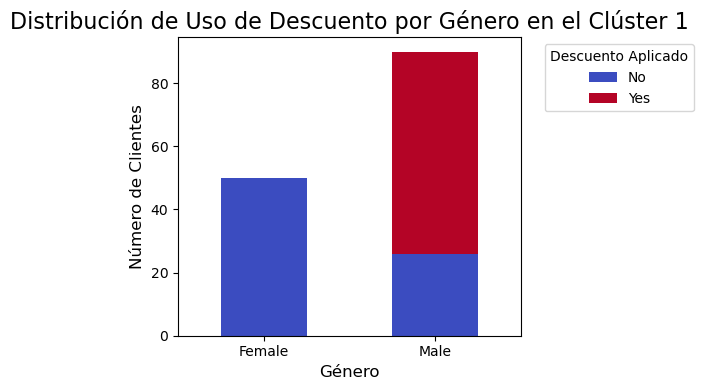

In [21]:
# Paso 2: Visualizar la relación con un gráfico de barras apiladas
# Esto nos dará una vista clara de la proporción de uso de descuentos por género.
contingency_table_discount.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')
plt.title('Distribución de Uso de Descuento por Género en el Clúster 1', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Descuento Aplicado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
# Paso 3: Realizar la prueba de Chi-cuadrado para la validación estadística
# Hipótesis Nula ($H_0$): Las variables 'Gender' y 'Discount Applied' son independientes.
# Hipótesis Alternativa ($H_a$): Las variables no son independientes (existe una relación).
chi2_discount, p_value_discount, dof_discount, expected_discount = chi2_contingency(contingency_table_discount)

# Imprimimos los resultados de la prueba en formato Markdown
print("\n### Resultados de la Prueba de Chi-cuadrado ###")
print(f"**Estadística de Chi-cuadrado:** ${chi2_discount:.4f}$")
print(f"**Valor p:** ${p_value_discount:.4f}$")
print("\n---")


### Resultados de la Prueba de Chi-cuadrado ###
**Estadística de Chi-cuadrado:** $62.6629$
**Valor p:** $0.0000$

---


In [23]:
# Paso 4: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value_discount < alpha:
    print(f"**El valor p de ${p_value_discount:.4f}$ es menor que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una asociación estadísticamente significativa entre el género y la aplicación de descuentos en el Clúster 1.")
    print("El gráfico de barras apiladas nos mostrará la proporción de cada género que aplica un descuento.")
else:
    print(f"**El valor p de ${p_value_discount:.4f}$ es mayor o igual que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una asociación estadísticamente significativa entre el género y la aplicación de descuentos en el Clúster 1.")
    print("El uso de descuentos en este clúster es consistente sin importar el género.")



### Interpretación del Resultado ###
**El valor p de $0.0000$ es menor que el nivel de significancia de $0.05$.**
**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una asociación estadísticamente significativa entre el género y la aplicación de descuentos en el Clúster 1.
El gráfico de barras apiladas nos mostrará la proporción de cada género que aplica un descuento.


Podemos concluir gracias al analisis anterior que en el Clúster 1, a pesar de que hay una cantidad similar de hombres y mujeres, existe una marcada diferencia en el comportamiento de compra. Los hombres de este grupo son significativamente más propensos a utilizar descuentos que las mujeres.

Este hallazgo es crucial para definir estrategias de marketing y ventas dirigidas a cada subgrupo dentro del clúster.